# Lecture 36 - Backpropagation continued; Best Practices for Training ANNs

# Error Backpropagation

* The learning procedure involves the presentation of a set of pairs of input and output patterns, $X=\{x_i\}_{i=1}^N$ and $Y=\{y_j\}_{j=1}^M$. The system uses the input vector to produce its own output vector and then compares this with the \emph{desire output}, or \emph{target output} $t=\{t_j\}_{j=1}^M$. If there is no difference, no learning takes place. Otherwise, the weights are changed to reduce the difference. This procedure is basically the perceptron learning algorithm.

* This procedure can be *automated* by the machine itself, without any outside help, if we provide some **feedback** to the machine on how it is doing. The feedback comes in the form of the definition of an *error criterion* or *objective function* that must be *minimized* (e.g. Mean Squared Error). For each training pattern we can define an error ($\epsilon_k$) between the desired response ($d_k$) and the actual output ($y_k$). Note that when the error is zero, the machine output is equal to the desired response. This learning mechanism is called **(error) backpropagation** (or **BP**).

* The backpropagation algorithm consists of two phases: 
     * **Forward phase:** computes the *functional signal*, feed-forward propagation of input pattern signals through the network.
    * **Backward phase:** computes the *error signal*, propagates the error backwards through the network starting at the output units (where the error is the difference between desired and predicted output values).

* **Objective function/Error Criterion:** there are many possible definitions of the error, but commonly in neuro-computing one uses the error variance (or power):

\begin{align*}
J(w) = \frac{1}{2}\sum_{k=1}^N \epsilon^2 = \frac{1}{2} \sum_{k=1}^N (d_k-y_k)^2 = \frac{1}{2} \sum_{k=1}^N (d_k-w^Tx_k)^2
\end{align*}

* Now we need to define an **adaptive learning** algorithm. Backpropagation commonly uses the gradient descent as the adaptive learning algorithm.

* **Adaptive Learning Algorithm:** there are many learning algorithms, the most common is the method of Gradient/Steepest Descent.
    * Move in direction opposite to the gradient, $\nabla J(\mathbf{w})$, vector (**gradient descent**):

\begin{align*}
w^{(n+1)} &= w^{(n)} + \Delta w^{(n)}
\end{align*}

This is known as the **error correction rule**. We define: 

\begin{align*}
\Delta w^{(n)} &= w^{(n)} - w^{(n-1)}\\
\Delta w^{(n)} &= - \eta \nabla J(w^{(n)})
\end{align*}

where $\eta$ is the learning rate.

## Backpropagation of the Error for the Output Layer

There are many approaches to train a neural network. One of the most commonly used is the **Error Backpropagation Algorithm**. 

Let's first consider the output layer:
* Given a training set, $\left\{ x_n, d_n\right\}_{n = 1}^N$, we want to find the parameters of our network that minimizes the squared error: 

\begin{align*}
J(w) = \frac{1}{2} \sum_{l=1}^N (d_l - y_l)^2
\end{align*}

* In order to use gradient descent, we need to compute the analytic form of the gradient, $\frac{\partial J}{\partial w_{lj}}$.

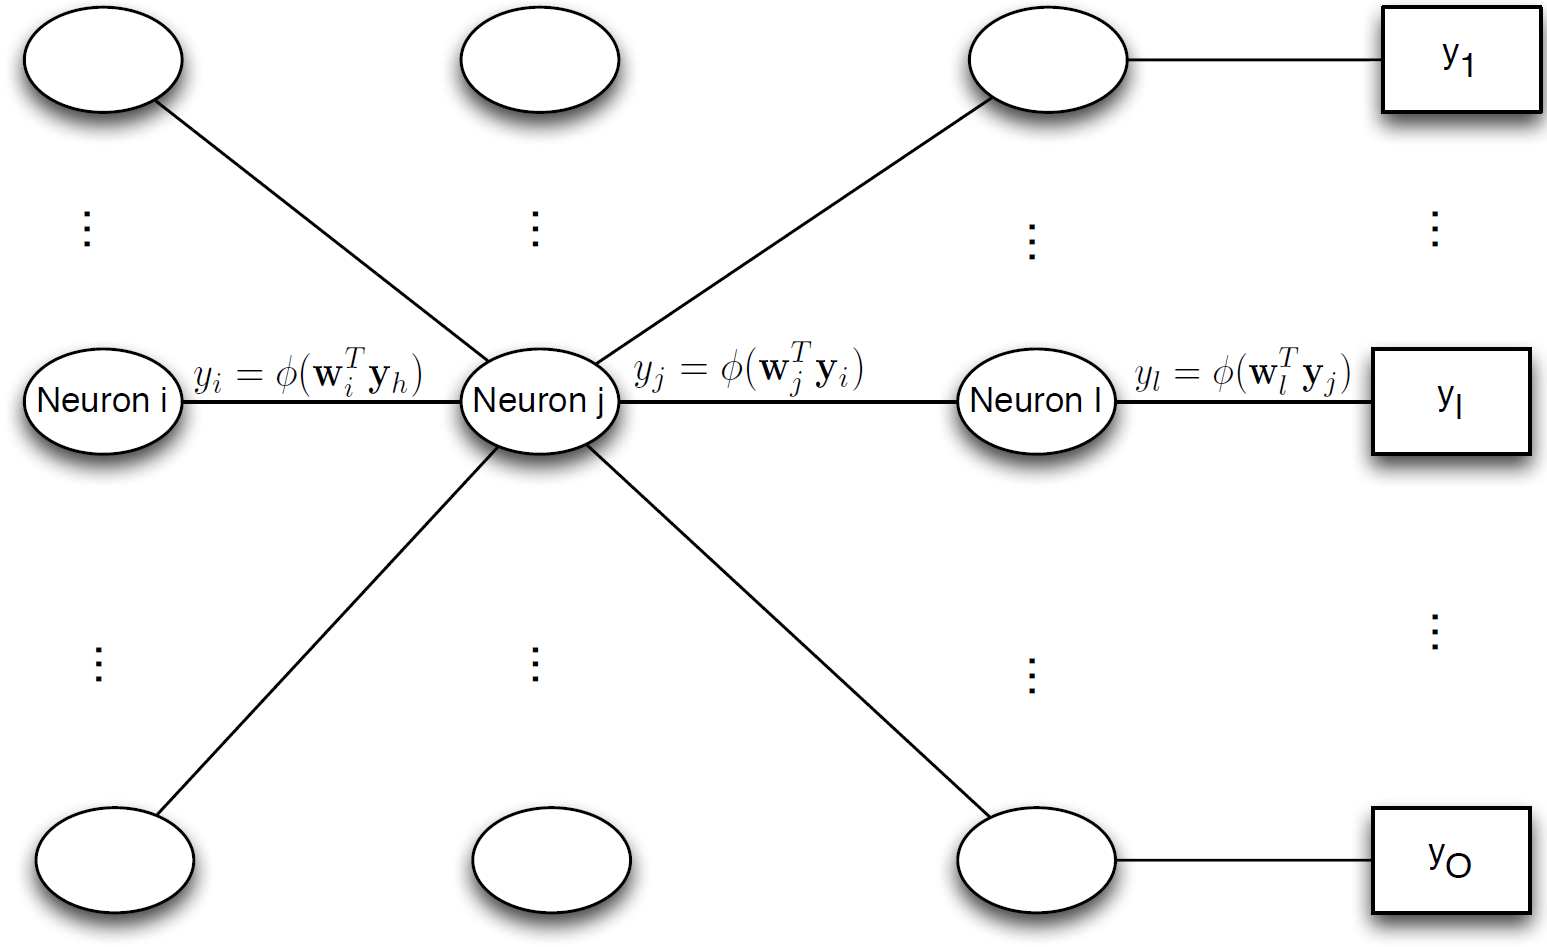

In [4]:
Image('figures/HiddenLayer.png',width=700)

<div class="alert alert-info">
    <b>Chain Rule</b>

Given a labelled training set, $\left\{ x_n, d_n\right\}_{n = 1}^N$, consider the objetive function 

\begin{align*}
J(w) = \frac{1}{2} \sum_{l=1}^N e_l^2
\end{align*}

where $w$ are the parameters to be estimated and $\forall l$: 

\begin{align*}
e_l &= d_l - y_l \\
y_l &= \phi(v_l)\text{, }\phi(\bullet)\text{ is an activation function}\\
v_l &= w^Tx_j\text{ (note that }x_j\in\mathbb{R}^{D+1}\text{)}  
\end{align*}

Using the Chain Rule, we find:

\begin{align*}
\frac{\partial J}{\partial w_{lj}} = \frac{\partial J}{\partial e_l} \frac{\partial e_l}{\partial y_l} \frac{\partial y_l}{\partial v_l} \frac{\partial v_l}{\partial w_{lj}}
\end{align*}

where
\begin{align*}
\frac{\partial J}{\partial e_l} = \frac{1}{2} 2 e_l = e_l = d_l - y_l
\end{align*}

\begin{align*}
\frac{\partial e_l}{\partial y_l} = -1
\end{align*}

\begin{align*}
\frac{\partial y_l}{\partial v_l} = \frac{\partial \phi(v_l)}{\partial v_l} = \phi'(v_l)
\end{align*}

\begin{align*}
\frac{\partial v_l}{\partial w_{lj}} = x_j
\end{align*}

Therefore

\begin{align*}
\frac{\partial J}{\partial w_{lj}} = e_l (-1) \phi'(v_l) x_j
\end{align*}

</div>

* If activation function is the sigmoid, $\phi(x) = \frac{1}{1+e^{-x}}$, then $\phi'(x) = \phi(x)(1-\phi(x))$

* If activation function is the hyperbolic tangent (tanh), $\phi(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$, then $\phi'(x) = 1-\phi(x)^2$

* If activation function is the ReLU, $\phi(x) = \begin{cases}0, & x \leq 0 \\ x, & x>0 \end{cases}$, then $\phi'(x) = \begin{cases}0, & x \leq 0 \\ 1, & x>0 \end{cases}$


Now that we have the gradient, how do we use this to update the output layer weights in our MLP?

\begin{align*}
w_{lj}^{(t+1)} = w_{lj}^{(t)} - \eta \frac{\partial J}{\partial w_{lj}} = w_{lj}^{(t)} + \eta e_i\phi'(v_l) x_j
\end{align*}

* How will this update equation  (for the output layer) change if the network is a multilayer perceptron with hidden units?

* Can you write this in vector form to update all weights simultaneously?

* Next, the hidden layers...

## Backpropagation of the Error for the Hidden Layers

* In a neural network, we can only define an error at the output layer! Therefore, we need to backward propagate the error obtain at the output layer, hence *backpropagation*.

Suppose we want to update $w_{ji}$ where $j$ is the hidden layer. (Let's follow the labeling in the figure below.)

The error objective function overall $N$ data points is 

\begin{align*}
J(w) = \frac{1}{2} \sum_{l=1}^N e_l^2 = \frac{1}{2} \sum_{l=1}^N \left(d_l - y_l\right)^2 = \frac{1}{2} \sum_{l=1}^N \left(d_l - \phi_l(v_l)\right)^2
\end{align*}

As we have seen earlier,

\begin{align*}
\frac{\partial J}{\partial w_{lj}} &= \frac{\partial J}{\partial e_l} \frac{\partial e_l}{\partial y_l} \frac{\partial y_l}{\partial v_l} \frac{\partial v_l}{\partial w_{lj}} \\
&= e_l (-1) \phi'(v_l) y_{jl}
\end{align*}

Let's define the *local gradient* $\delta_l$:

\begin{align*}
\delta_l &= -\frac{\partial J}{\partial v_l} \\
&= e_l \phi'(v_l)
\end{align*}

Similarly,

\begin{align*}
\delta_j &= -\frac{\partial J}{\partial v_j} \\
&= -\frac{\partial J}{\partial y_j} \frac{\partial y_j}{\partial v_j} \\
&= -\frac{\partial J}{\partial y_j} \phi'(v_j)
\end{align*}

Note that,

\begin{align*}
\frac{\partial J}{\partial y_j} &= \sum_l \frac{\partial J}{\partial e_l} \frac{\partial e_l}{\partial y_l} \frac{\partial y_l}{\partial v_l} \frac{\partial v_l}{\partial y_j} \\
&= \sum_l e_l (-1) \phi'(v_l) w_{lj} \\
\end{align*}

So,

\begin{align*}
\delta_j &= -\frac{\partial J}{\partial y_j} \phi'(v_j) \\
&= - \left[ \sum_l e_l (-1) \phi'(v_l) w_{lj} \right] \phi'(v_j) \\
&= \phi'(v_j)\sum_l \delta_l w_{lj}
\end{align*}

* We can write the gradient at a hidden neuron in terms of the local gradient and the connect neurons in the next layer:

\begin{align*}
\Delta w_{ij} = \eta \delta_j x_i
\end{align*}

And so,

\begin{align*}
w_{ij}^{t+1} \leftarrow w_{ij}^{t} + \Delta w_{ij}^{t}
\end{align*}

___

# Best Practices for Training ANNs

## 1. Defining Network Architecture

Suppose you have a set of data $\{x_i\}_{i=1}^N \in \mathbb{R}^D$. 

* What size network should you choose? How many layers? How many units per layer?

**Input Layer**

* Regardless of whether you are utilizing processing the **input space** or **feature space** of a given data set, the number of neurons in the input layer is the same as the dimensionality of the space.

**Output Layer**

* Suppose you are trying to do classification, then your output layer will represent the class labels.
* You can have different types of output encoding which directly impact performance.

**Output Layer Encoding (also called Feature Engineering):**
* Common encoding methods for classification:
    1. Integer encoding label for each class
    2. One-hot encoding (binary vectors with one indicator for each class)
    3. Binary (or other base) encoding
    
**Hidden Layer**
* We don't really know how many neurons to add in the hidden layer or how many hidden layers to use.
* **Rule of Thumb**: the amount of training data you need for a *well* performing model is 10x the number of parameters in the model.
    * Data will directly impact model choice...
    
**Example:** A network is said to have architecture 10-100-50-5 if its input layer has 10 units, 1st hidden layer 100 units, 2nd hidden layer 50 units and output layer 5 units.

## 2. Learning Rate

Backpropagation provides an approximation to the trajectory in the weight space computed by the method of **gradient descent**.

* The gradient descent is a 1st-order optimization algorithm (uses 1st derivative)

* Other methods can also be used, for example, Newton's method, a 2nd-order optimization algorithm (uses 2nd derivative)

**Delta Rule**

\begin{align}
w^{(t+1)} &= w^{(t)} + \Delta w^{(t)}\\
\Delta w^{(t)} &= - \eta \nabla J(w^{(t)})\\
\nabla J(w^{(t)}) &= w^{(t+1)} - w^{(t)}
\end{align}

Stable values for the learning rate $\eta$ are $0 < \eta < 1$.

* When $\eta >0$ but small (e.g. $0 <\eta <0.001$), the cost function decreases, the weights are updated very slowly and the learning trajectory is smooth.

* When $\eta > 0$ but too large (e.g. $\eta>1000$), may result in large changes in the weights and cause the cost function to become unstable (oscillatory).

## 3. Optimization Techniques with Gradient Descent

1. **Accelerated Gradient Descent strategies**: (1) add a momentum term, (2) use Nesterov's formula

2. **Adaptive Learning Rate**: (1) AdaGrad, (2) Adam

3. **Gradient Descent for ML**: (1) Stochastic Gradient Descent, (2) Batch/Mini-batch Gradient Descent

1. **Accelerated Gradient Descent**

We can include a **momentum term**: it tries to increase rate of learning while avoiding instability. 

The **Generalized Delta Rule - Delta Rule with momentum** is:

$$\Delta w_{ji}^{(t)} = \alpha \Delta w_{ji}^{(t-1)} - \eta \delta_j^{(t)} y_i^{(t)}$$

where $\alpha$ is usually set to 0.9 or a similar value, and $(t)$ stands for iteration.

Observations:
* $\Delta w_{ji}(n)$ is a the sum of exponentially weighted time series. For it to converge, $0 \leq |\alpha| < 1$
* If $\alpha = 0$, then we are operating without a momentum term

* Inclusion of momentum accelerates descent in steady down-hill directions
* Inclusion of momentum has a stabilizing effect in directions that oscillate in sign
* Momentum may prevent termination/convergence in a shallow/local minimum

* The learning rate *can* be connection dependent, $\eta_{ji}$, we can even set it to zero for some connections
* Yurii Nesterov noticed that as we reach the minima i.e the lowest point on the curve, the momentum is pretty high and it does not know to slow down at that point due to the high momentum which could cause it to miss the minima entirely and continue moving up. He introduced the now called **Nesterov accelerated gradient (NAG)**.

2. **Nesterov Accelerated Gradient (NAG)**

$$w_{ij}^{(t)} = y^{(t)} - \eta \nabla J(y^{(t)})$$

$$y^{(t)} = w_{ij}^{(t)} + \mu (w_{ij}^{(t)} - w_{ij}^{(t-1)})$$

* **Gradient Descent with momentum**: (1) computes the gradient at current location, and then (2) to that gradient, adds a momentum step in the direction of the previous gradient.

* **NAG**: (1) adds a momentum term in the direction of the previous gradient, and then (2) computes the gradient at that location.

3. **Adaptive Learning Rate**

In addition to being able to speed up Gradient Descent, we can also **update the learning rate** to perform larger or smaller updates depending on their importance.

$$\Delta w_{ij}^{(t)} = - \eta^{(t)} \nabla J(w_{ij}^{(t)})$$

* **AdaGrad (Adaptive Gradient algorithm, 2011)**: It simply allows the learning rate to decrease based on the parameters of the network. So it makes big updates for infrequent parameters, and small updates for frequent parameters. For this reason, it is well-suited for dealing with sparse data. Its main weakness is that its learning rate is always decreasing and decaying.

* **RMSProp (Root Mean Squared Progagation algorithm, 2012):** RMSProp is also a method in which the learning rate is adapted for each of the parameters in the network. The idea is to divide the learning rate for a parameter by a running average of the magnitudes of recent gradients for that weight.

* **Adam (Adaptive Moment Estimation, 2015):** Adam combines RMSProp and momentum learning. It is by far the most common method used today. Adam also computes adaptive learning rates for each parameter of the network. In this optimization algorithm, running averages of both the gradients and the second moments of the gradients are used.

## 4. Online/Stochastic vs Batch Learning

The number of samples used to perform a single training iteration (forward pass + backward pass) will impact the results.

* **Online Learning** (or stochastic/sequential learning): uses one sample to update the parameters of the network.
* **Batch Learning:** uses the entire training set to update the parameters of the network.

**Online Learning**

* Online learning performs local updates based on a single data sample

* One **iteration** consists of a forward pass and a backward pass

* One **epoch** consists of a pass through all training samples

* Suppose we have $N$ training samples, then one epoch has $N$ parameter updates.

* It is good practice to randomly reorder the data points between each epoch. Yes! *Why?*

* Online mode of training requires less local storage for each synaptic connection

* Online mode of training makes the search in the weight space *stochastic* in nature

**Batch Learning**

* Batch learning performs *global* updates based on the entire training set

* One epoch in Batch learning, only has 1 iteration

* The errors in backward pass are the averaged error over all training samples

* Batch mode can ensure convergence to at least a local minimum

* Batch mode is easier to parallelize

* If a data set is has correlated features, online learning is more able to take advantage of this - unlike batch learning

**Mini-Batch Learning**

* We can consider mini-batch sets and perform updates based on each mini-batch.

* Similarly to online learning, it is common practice to create new random samples for each mini-batch set for each epoch. *Why?*

* Mini-batches need to be balanced for class representation

* Common sizes are 32, 64 and 128

## 5. Stopping Criteria

Backpropagation cannot be shown to converge. We want it to stop at the global minimum. A necessary condition for this is $J(w^*)=0$.

**Criterion 1**: The Backpropagation algorithm is considered to have converged when the Euclidean norm of the gradient vector reaches a sufficiently small threshold
* learning may take a long time
* must compute the norm of the gradient vector

**Criterio 2**: The Backpropagation algorithm is considered to have converged when the absolute rate of change in the average squared error per epoch is sufficiently small.
* may result in premature termination of learning
* can test after each epoch for generalization ability, when it peaks, then stop

## 6. Overfitting, Generalization & Cross-Validation

Generalization is mostly influenced by three factors:
1. Size of training set (may or may not have control)
2. Architecture of the network (we control)
3. Physical complexity of problem (no control)

* The goal is to reduce generalization error (error when given inputs from the test set)

* When complexity is small compared to training size, performance is generally insensitive to training data size

* As target function gets more complex, relative to training size, the size of the training set has more effect

* The Rule of thumb: 80% training, 20% testing

* We should also use cross-validation

## 7. Minimizing Information Content

* Cross-Entropy cost function
* Provide training samples that provide the largest information content
* Use example with largest training error
* Use example radically different than the ones before

* Emphasizing scheme, present more difficult patterns to the network, difficulty is determined by error
* Problems with emphasizing scheme:
    * Distribution of samples in an epoch is distorted
    * Outliers or mislabeled samples can cause major problems

## 8. Activation Functions

MLPs may learn better with activation functions that are antisymmetric $\phi(-v) = -\phi(v)$ (e.g. hyperbolic tangent function) rather than non-symmetric (e.g. sigmoid function)
* If the activation function is non-symmetric, the output of each neuron is restricted to the interval $[0,1]$. Such a choice introduces a source of systematic bias for those neurons located beyond the first layer of the network.

* With an antisymmetric activation function, the output of each neuron is permitted to assume both positive and negative values in the interval $[-1,1]$, in which case it is likely for its mean to be zero.
* If the network connectivity is large, backpropagation learning with anti-symmetric activation functions can yield faster convergence than a similar process with non-symmetric, for which there is also empirical evidence.

## 9. Data Scaling

Data scaling is an important step of a ML system and an MLP is no different.

* For the learning time to be minimized, the use of *non-zero mean inputs should be avoided*
* It is good if the input variables are uncorrelated
* It is good if variances are approximately equal (standardization)

## 10. Initialization

The initialization of the weights of neural networks is a whole field of study as the careful initialization of the network can speed up the learning process.

Most common: small Normal random values.

Other methods include: zeros, ones, constant, uniformly random, truncated Normal random, orthogonal, identity, LeCun uniform, LeCun normal,  He uniform, He normal, Xavier uniform, Xavier normal.

## 11. Network Pruning Techniques

* **Network Growing**: Start with a small MLP and add to it when unable to meet design specifications

* **Network Pruning**: Start with a large MLP and prune it by eliminating weights (driving them to zero)

* **Complexity Regularization**: Need an appropriate trade-off between reliability of training data and goodness of the model/NN architecture

* We can find trade-off my minimizing the total risk: 

$$R(w) = J_e(w)+ \lambda J_c(w)$$ 

where $J_e$ is the performance/error measure, $J_c$ is the complexity penalty, and $\lambda$ is a regularization parameter that represents the relative importance of the complexity penalty with respect to the performance measure term.
* $\lambda = 0$: Training based only on training samples
* $\lambda \rightarrow \infty$: Training samples are unreliable, minimize complexity

1. **Weight Decay:** $J_c(w) = \Vert w\Vert_2^2 = \sum_i w_i^2$

2. **Weight Sparsity:** $J_c(w) = |w| = \sum_i |w_i|$

3. **Weight Elimination:**
$$ J_c(w) = \sum_i \frac{\left(\frac{w_i}{w_0}\right)^2}{1+\left(\frac{w_i}{w_0}\right)^2}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

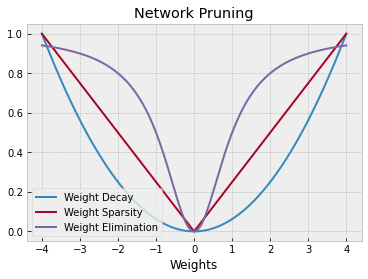

In [2]:
N = 1000
w = np.linspace(-4,4,N)
w0 = 1
Jc1 = w**2/np.max(w**2)
Jc2 = np.abs(w)/np.max(np.abs(w))
Jc3 = (w/w0)**2/ (1 + (w/w0)**2)

plt.plot(w, Jc1, label = 'Weight Decay'); 
plt.plot(w, Jc2, label = 'Weight Sparsity');
plt.plot(w, Jc3, label = 'Weight Elimination'); 
plt.legend(loc='lower left')
plt.title('Network Pruning'); 
plt.xlabel('Weights');

### Emsemble Learning: Boosting

Boosting is an ensemble learning method.

If we take a collection of very poor (weak in the jargon) learners, each performing only just better than chance, then by putting them together it is possible to make an ensemble learner that can perform arbitrarily well. So we just need lots of low-quality learners, and a way to put them together usefully, and we can make a learner that will do very well.

The principal algorithm of boosting is named **AdaBoost** (Adaptive Boosting). Essentially, it give weights to each data point according to how difficult previous learners have found to get it correct. These weights are given to the classifier as part of the input when it is trained. The predictions from all learners are then combined through a weighted majority vote (or sum) to produce the final prediction.

Example: random forests

### Emsemble Learning: Bagging

Bagging (bootstrap aggregating) is an emsemble learning method. Bagging is a technique for reducing generalization error by combining several models. The idea is to train several different models separately, then have all the models vote on the output for test examples. This is an example of a general strategy in machine learning called model averaging. The reason that model averaging works is that different models will usually not make all the same errors on the test set.

Bagging methods work best with strong and complex models, in contrast with boosting methods which usually work best with weak models.

## 12. Determining Whether to Gather More Data

After the ﬁrst end-to-end system is established, it is time to measure the performance of the algorithm and determine how to improve it. It is often much better to gather more data than to improve the learning algorithm (or first model of choice).

How does one decide whether to gather more data?

1. Determine whether the performance on the training set is acceptable. If performance on the training set is poor, the learning algorithm is not using the training data that is already available, so there is no reason to gather more data. 
    * Instead, try adding complexity to the model by adding more layers or adding more hidden units to each layer. 
    * Also, try improving the optimization algorithm, for example by tuning the learning rate. 
    * If more complex models and carefully tuned optimization algorithms do not work well, then the problem might be the *quality* of the training data. The data may be too noisy or may not include the right inputs needed to predict the desired outputs. This suggests starting over, collecting cleaner data, or collectinga richer set of features.

2. If the performance on the training set is acceptable, then measure the performance on a test set. If the performance on the test set is also acceptable, then there is nothing left to be done. If test set performance is much worse than training set performance, then gathering more data is one of the most effective solutions. In some applications, gathering more data is simply infeasible or impossible. 
    * A simple alternative to gathering more data is to reduce the size of the model or improve regularization, by adjusting hyperparameters such as weight decay coeﬃcients,or by adding regularization strategies such as dropout. 
    * If you ﬁnd that the gap between train and test performance is still unacceptable even after tuning the regularization hyperparameters, then gathering more data is advisable.
    
3. When deciding whether to gather more data, it is also necessary to decide how much to gather. It is helpful to plot curves showing the relationship between training set size and generalization error. 
    * You can experiment with training set sizes on a logarithmic scale, for example, doubling the number of examples between consecutive experiments.

# Decision Maps in MLPs

[A Neural Network Playground](https://playground.tensorflow.org/#activation=tanh&regularization=L2&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=10&networkShape=2&seed=0.66302&showTestData=false&discretize=false&percTrainData=80&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) is a great tool to provide visual interpretation of MLPs performance. You can choose and interpret the effect of the use of different features, architecture size, learning rate, among others.